In [11]:
# dependencies and setup
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
# defining data path
data_path=Path('resources/cancer_patient_data_sets.csv')
# Reading data source using pandas
cancer_df=pd.read_csv(data_path)

In [5]:
# looking for dataframe
cancer_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
# shape of dataframe
cancer_df.shape

(1000, 25)

In [7]:
#data types of dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [8]:
#looking for target columns
cancer_df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [10]:
#dropping unnecessary columns
cancer_df.drop(columns=['Patient Id'], inplace=True)

In [12]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=cancer_df.drop('Level', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=cancer_df['Level'].values 

In [13]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [15]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [16]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.889064  ,  1.26299474,  1.09529037, ..., -0.26532126,
         0.0752096 , -0.63630361],
       [-0.02129693, -0.79176894,  2.08980342, ...,  0.27985941,
        -0.90578515,  0.03965632],
       [ 0.14422324, -0.79176894,  0.10077732, ...,  1.91540143,
         0.56570697,  2.06753608],
       ...,
       [-0.10405701,  1.26299474, -0.89373573, ..., -0.26532126,
        -0.90578515,  0.03965632],
       [ 0.97182409, -0.79176894,  1.09529037, ...,  1.37022076,
         1.54670172, -0.63630361],
       [ 0.97182409, -0.79176894,  1.09529037, ...,  1.37022076,
         1.54670172, -0.63630361]])

In [17]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.889064  ,  1.26299474, -1.39099225, ..., -1.3556826 ,
        -0.90578515, -1.31226353],
       [ 2.04770518, -0.79176894,  1.09529037, ..., -0.26532126,
         0.0752096 , -0.63630361],
       [-1.2626982 , -0.79176894,  1.09529037, ..., -0.26532126,
         0.0752096 , -0.63630361],
       ...,
       [ 0.889064  , -0.79176894, -1.39099225, ..., -1.3556826 ,
        -0.90578515, -1.31226353],
       [-0.51785744,  1.26299474, -0.3964792 , ...,  1.37022076,
         0.56570697,  0.71561624],
       [ 0.06146316,  1.26299474,  1.09529037, ..., -0.26532126,
         0.0752096 , -0.63630361]])

In [24]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled, y_train=y_train):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("******************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("************Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("******Confusion Matrix using cross_val_predict****")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("***********Classification Report******************")
    print(cr)
    print()
    
    
    
    
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("********************Train Score******************")
    print(train_score)
    print()

    print("*********************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("**************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("**********Classification Report******************")
    print(cr)
    print()
    



##  Model 1: Decision Tree Classifier

In [25]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [26]:
#score for Decision Tree using only training data
train_score(dt)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




### Tuning hyperparamaters  using Grid Search CV for Decision Tree

In [27]:
#### Using GridSearchCV
param_grid_dt = {'criterion': ['gini','entropy'],
             'max_depth':[10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=1, n_jobs=-1)

In [28]:
grid_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000]},
             verbose=1)

In [29]:
# best parameters for this dataset
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1}


In [30]:
# best score
print(grid_dt.best_score_)

1.0


In [31]:
#best estimator
dt_b=grid_dt.best_estimator_
dt_b

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [32]:
#score for decision tree using training data
train_score(dt_b)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




##  Model 2: Random Forest Classifier

In [33]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [34]:
#score for Random Forest Classifer using only training data
train_score(rf)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.0040438  0.00049232 0.02670214 0.06775077 0.05229895 0.03709188
 0.03847319 0.02056598 0.04560864 0.10413511 0.02619083 0.08076499
 0.03415049 0.11218261 0.06989146 0.01820792 0.02618348 0.07379419
 0.04687932 0.04307311 0.02868462 0.00840301 0.03443118]


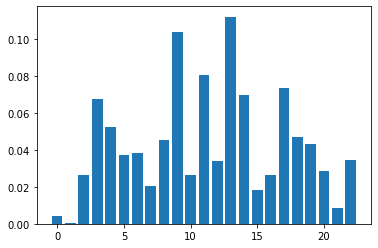

In [35]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [36]:

param_grid_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, verbose=1, n_jobs=-1)

In [37]:
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [38]:
# best parameters for this dataset
print(grid_rf.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10000, 'criterion': 'gini'}


In [39]:
# best score
print(grid_rf.best_score_)

1.0


In [40]:
#best estimator
rf_b=grid_rf.best_estimator_
rf_b

RandomForestClassifier(max_depth=10000, n_estimators=200)

In [41]:
#score for random forest using training data
train_score(rf_b)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




##  Model 3: Extremely Random Trees


In [42]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

In [43]:
#score for Extremely Random Trees using only training data
train_score(rt)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[0.00416321 0.00161497 0.04041471 0.05717903 0.04835721 0.02932583
 0.05327106 0.03329555 0.04931848 0.09138981 0.03804004 0.07671416
 0.0347826  0.07322062 0.06323706 0.02603395 0.04679898 0.0574767
 0.04526998 0.03578097 0.03596714 0.02128241 0.03706552]


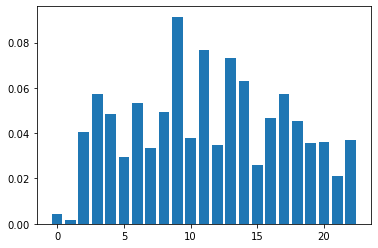

In [44]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [45]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(rt, param_rand_rt, cv=5, verbose=1, n_jobs=-1)

In [46]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [47]:
# best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 1000, 'criterion': 'gini'}


In [48]:
# best score
print(rand_rt.best_score_)

0.992


In [49]:
#best estimator
rt_b=rand_rt.best_estimator_
rt_b

ExtraTreesClassifier(max_depth=1000, min_samples_leaf=10, n_estimators=200)

In [50]:
#score for extra tree classifier using training data
train_score(rt_b)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1.    0.972 1.   ]

******Confusion Matrix using cross_val_predict****
[[254   0   7]
 [  0 234   3]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       261
           1       1.00      0.99      0.99       237
           2       0.96      1.00      0.98       252

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750




##  Model 4: Boosting


In [51]:
# Creating a AdaBoostClassifier model on the scaled data
ab= AdaBoostClassifier(base_estimator = dt)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [52]:
#score for adaboost using only training data
train_score(ab)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750




[1.88752670e-15 0.00000000e+00 3.28661641e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.81020665e-01 0.00000000e+00 3.72374608e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.29110829e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.07751144e-01 1.09742755e-01]


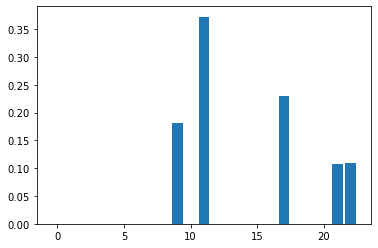

In [53]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for AdaBoostClassifier

In [54]:
#### Using GridSearchCV
param_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.1]}
rand_ab = GridSearchCV(ab, param_ab, cv=3, verbose=1, n_jobs=-1)

In [55]:
rand_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'n_estimators': [100, 200, 500, 1000, 2000, 5000]},
             verbose=1)

In [56]:
# best parameters for this dataset
print(rand_ab.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


In [57]:
# best score
print(rand_ab.best_score_)

1.0


In [58]:
#best estimator
ab_b=rand_ab.best_estimator_
ab_b

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [59]:
#score for adaboost classifier using training data
train_score(ab_b)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[1. 1. 1.]

******Confusion Matrix using cross_val_predict****
[[261   0   0]
 [  0 237   0]
 [  0   0 252]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       252

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


